# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./banking.csv')
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
5498,40,services,divorced,high.school,no,no,no,telephone,may,wed,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0
38800,37,admin.,married,high.school,no,no,no,telephone,jun,mon,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0
5538,56,management,married,unknown,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3059,51,entrepreneur,married,illiterate,no,yes,no,cellular,apr,thu,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.410,5099.1,1
3314,44,services,single,high.school,no,no,no,cellular,nov,wed,...,4,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0


## EDA

In [3]:
import seaborn as sns
from IPython.display import display

display(pd.crosstab(index=df['housing'], columns=df['y'], normalize='columns'))
display(pd.crosstab(index=df['loan'], columns=df['y'], normalize='columns'))
display(pd.crosstab(index=df['marital'], columns=df['y'], normalize='columns'))
display(pd.crosstab(index=df['education'], columns=df['y'], normalize='columns'))

y,0,1
housing,,
no,0.454088,0.436638
unknown,0.024160,0.023060
yes,0.521752,0.540302


y,0,1
loan,,
no,0.823574,0.829741
unknown,0.024160,0.023060
yes,0.152266,0.147198


y,0,1
marital,,
divorced,0.113166,0.102586
married,0.612783,0.545690
single,0.272190,0.349138
unknown,0.001861,0.002586


y,0,1
education,,
basic.4y,0.102550,0.092241
basic.6y,0.057568,0.040517
basic.9y,0.152457,0.101940
high.school,0.232133,0.222198
illiterate,0.000383,0.000862
professional.course,0.127175,0.128233
university.degree,0.287239,0.359914
unknown,0.040495,0.054095


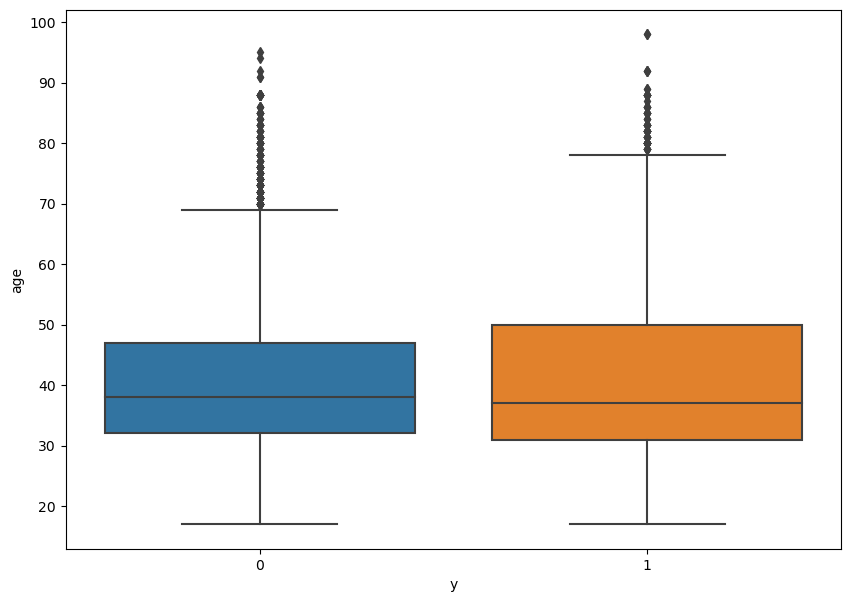

In [4]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='y', y='age')
plt.show()

## Building the Model

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = df.drop(columns=['y']), df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)          # <--- error!!
model.predict(X_test)

ValueError: could not convert string to float: 'management'

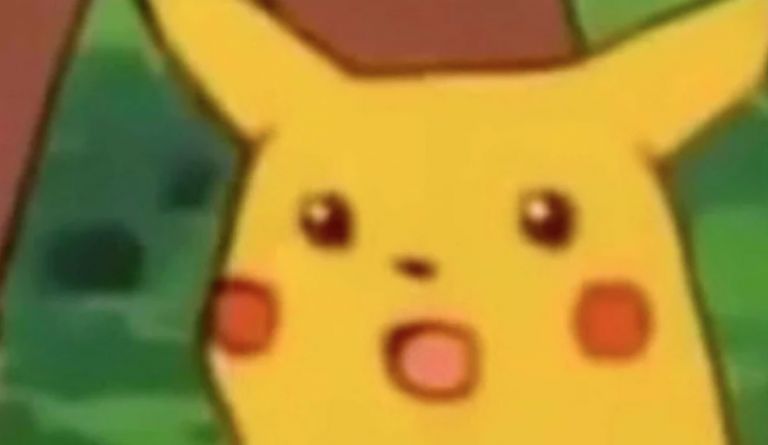

## For now, let's drop the categorical variables

In [7]:
X

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2
...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

X, y = df.drop(columns=cat_vars+['y']), df['y']

model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

scores = cross_val_score(model, X, y, scoring='accuracy')
print(f'accuracy of the model: {np.mean(scores)}')

accuracy of the model: 0.9088326723345768


## Handling the categorical variables - One-Hot Encoding

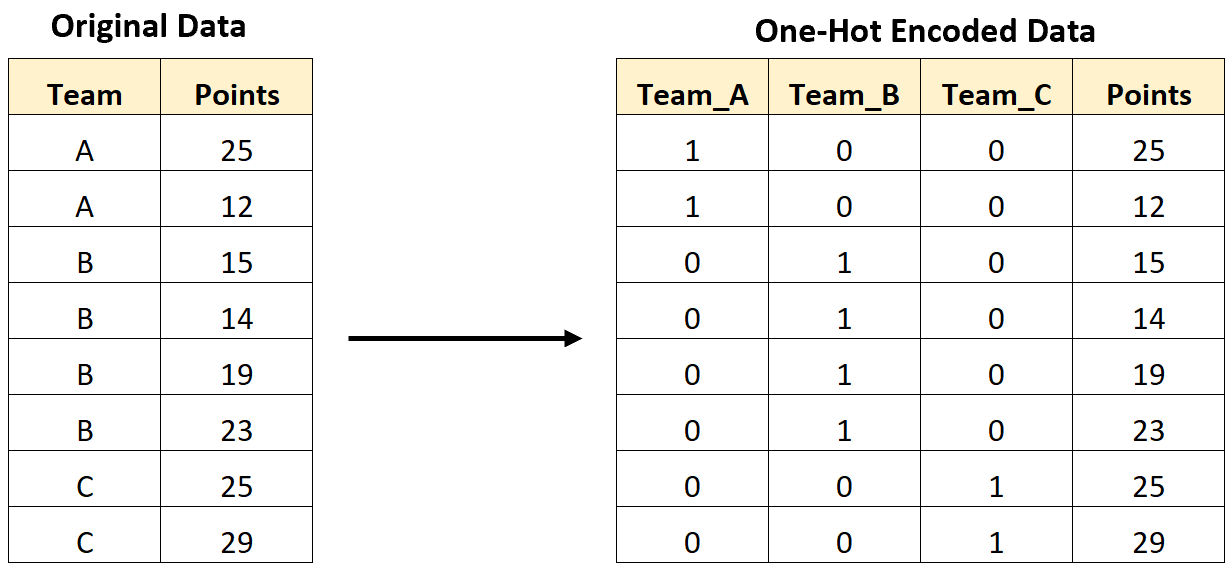

In [11]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

display(df.columns)

X, y = df.drop(columns=['y']), df['y']
X = pd.get_dummies(X)
for var in cat_vars:
    df[var] = df[var].astype('category')

X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

model.fit(X_train, y_train)
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, scoring='accuracy')
print(f'average accuracy = {np.mean(scores)}')

average accuracy = 0.9107992663212962


## Getting the Probability of Belonging to a Class

In [13]:
model.fit(X, y)
y_prob = model.predict_proba(X)
y_prob

array([[0.98653246, 0.01346754],
       [0.97891577, 0.02108423],
       [0.25426229, 0.74573771],
       ...,
       [0.98636202, 0.01363798],
       [0.63147053, 0.36852947],
       [0.98411224, 0.01588776]])

# Choosing the Decision Boundary

*The default value for the threshold in `LogisticRegression` model is 0.5. Is it always the optimal decision?*

In [14]:
import numpy as np
import matplotlib.pyplot as plt

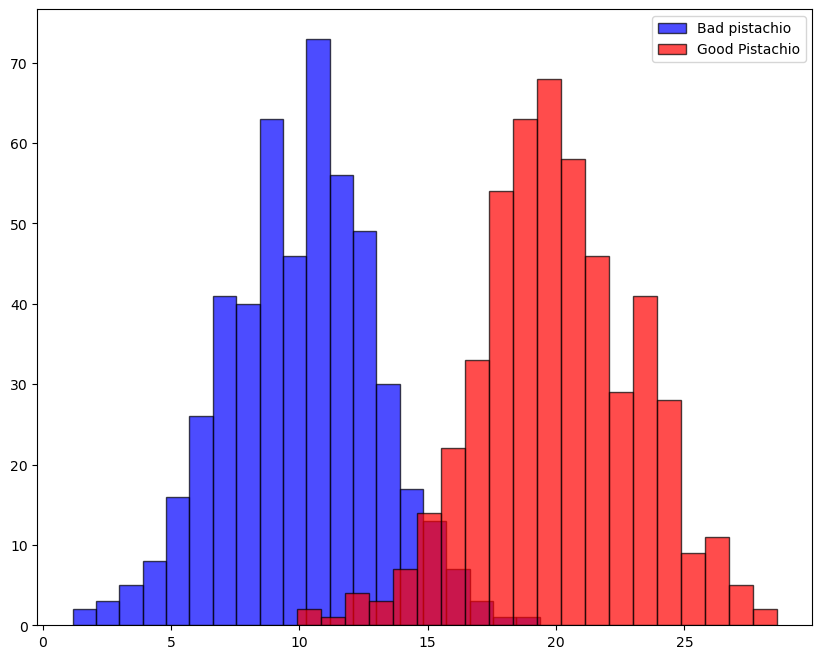

In [14]:
n = 500
X = np.concatenate([
    np.random.normal(10, 3, size=n),
    np.random.normal(20, 3, size=n)
])[:, None]
y = np.array(
    [0]*n+[1]*n
)
plt.figure(figsize=(10, 8))
plt.hist(X[y==0], color='blue', alpha=0.7, bins=20, edgecolor='black')
plt.hist(X[y==1], color='red', alpha=0.7, bins=20, edgecolor='black')
plt.legend(['Bad pistachio', 'Good Pistachio'])
plt.show()

## The Optimal Decision Boundary

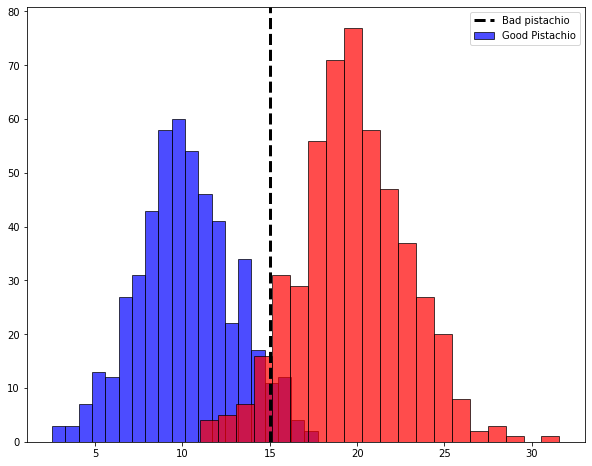

In [16]:
plt.figure(figsize=(10, 8))
plt.hist(X[y==0], color='blue', alpha=0.7, bins=20, edgecolor='black')
plt.hist(X[y==1], color='red', alpha=0.7, bins=20, edgecolor='black')
plt.axvline(15, c='black', linestyle='--', linewidth=3)
plt.legend(['Bad pistachio', 'Good Pistachio'])

plt.show()

## Weighted Error

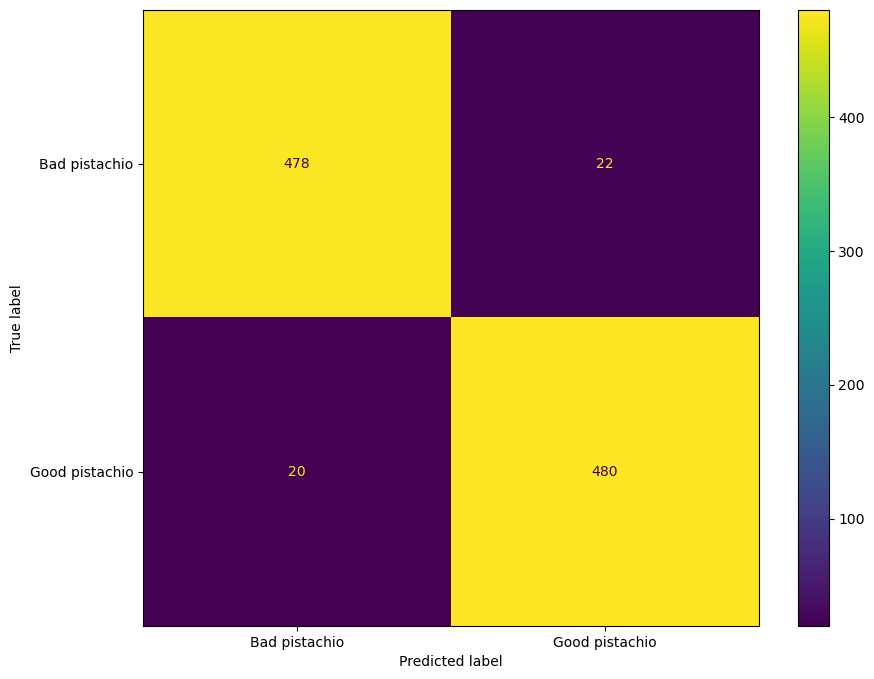

weighted loss = 12200


In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = (X >= 15)[:, 0]
cm = confusion_matrix(y, y_pred)

fig = plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay(cm, display_labels=['Bad pistachio', 'Good pistachio']).plot(ax=fig.gca())
plt.show()

weighted_error = cm[0, 1]*100 + cm[1, 0]*500

print(f'weighted loss = {weighted_error}')

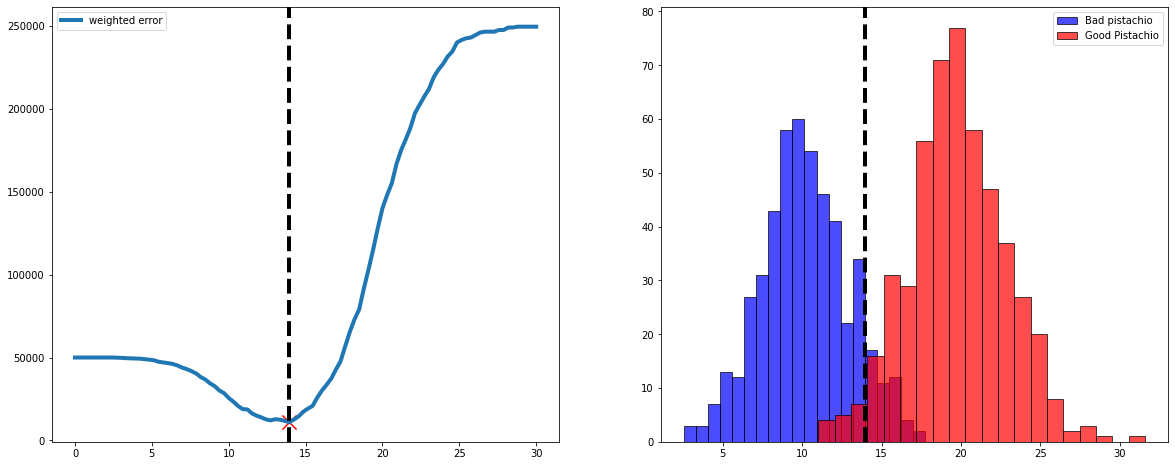

In [18]:
T = np.linspace(0, 30, 100)
weighted_errors = []
for t in T:
    y_pred = (X >= t)[:, 0]
    cm = confusion_matrix(y, y_pred)
    weighted_error = cm[0, 1]*100 + cm[1, 0]*500
    weighted_errors.append(weighted_error)

min_t, min_error = T[np.argmin(weighted_errors)], np.min(weighted_errors)

_, axes = plt.subplots(ncols=2, figsize=(20, 8))
plt.sca(axes[0])
plt.plot(T, weighted_errors, linewidth=4)
plt.scatter([min_t], [min_error], s=200, c='red', marker='x')
plt.axvline(min_t, linewidth=4, linestyle='--', color='black')
plt.legend(['weighted error'])

plt.sca(axes[1])
plt.hist(X[y==0], color='blue', alpha=0.7, bins=20, edgecolor='black')
plt.hist(X[y==1], color='red', alpha=0.7, bins=20, edgecolor='black')
plt.legend(['Bad pistachio', 'Good Pistachio'])
plt.axvline(min_t, linewidth=4, linestyle='--', color='black')

plt.show()

# Type I Error, Type II Error

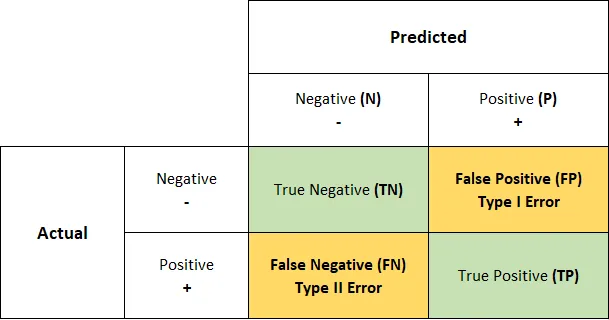

# Misc.

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)
y_prob = model.predict_proba(X)

Text(0, 0.5, 'Probability')

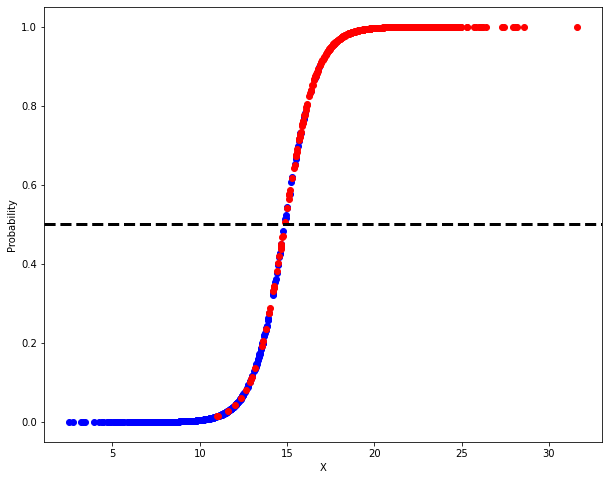

In [29]:
plt.figure(figsize=(10, 8))
plt.scatter(X[y==0, 0], y_prob[y==0, 1], c='blue')
plt.scatter(X[y==1, 0], y_prob[y==1, 1], c='red')
plt.axhline(0.5, color='black', linewidth=3, linestyle='--')
plt.xlabel('X')
plt.ylabel('Probability')

# Multiclass Classification